In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [120]:
df = pd.read_csv("./kaggle_income.csv", encoding = "ISO-8859-1")
print(df)

            id  State_Code   State_Name State_ab              County  \
0      1011000           1      Alabama       AL       Mobile County   
1      1011010           1      Alabama       AL      Barbour County   
2      1011020           1      Alabama       AL       Shelby County   
3      1011030           1      Alabama       AL       Mobile County   
4      1011040           1      Alabama       AL       Mobile County   
...        ...         ...          ...      ...                 ...   
32521   720296          72  Puerto Rico       PR  Adjuntas Municipio   
32522  7202966          72  Puerto Rico       PR  Adjuntas Municipio   
32523  7202976          72  Puerto Rico       PR  Adjuntas Municipio   
32524  7202986          72  Puerto Rico       PR  Adjuntas Municipio   
32525  7202996          72  Puerto Rico       PR  Adjuntas Municipio   

                 City            Place   Type Primary  Zip_Code Area_Code  \
0           Chickasaw   Chickasaw city   City   place     

In [121]:
df.describe()

,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
count,3.252600e+04,32526.000000,32526.000000,3.252600e+04,3.252600e+04,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000
mean,6.203707e+07,28.624885,50182.648404,1.165893e+08,6.952054e+06,37.731983,-91.303844,66703.986042,85452.938818,47273.695321,576.910273
std,1.115546e+08,16.297205,29410.122808,1.280894e+09,2.092093e+08,5.579450,16.227588,30451.194599,87810.895132,16555.486882,3911.006939
min,1.026000e+03,1.000000,601.000000,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
25%,8.021282e+06,13.000000,26362.000000,1.906991e+06,0.000000e+00,34.013469,-97.664034,46015.500000,36046.250000,36075.000000,201.436458
50%,2.901168e+07,29.000000,48163.000000,5.022976e+06,2.703350e+04,38.925588,-87.139280,60738.000000,51874.500000,46179.000000,329.482618
75%,4.802899e+07,42.000000,76712.000000,3.090984e+07,5.082078e+05,41.495793,-79.852969,82223.500000,80915.000000,58078.000000,590.227670
max,4.802211e+08,72.000000,99950.000000,9.163267e+10,2.453228e+10,71.253500,-65.500823,242857.000000,300000.000000,113936.000000,612241.922964


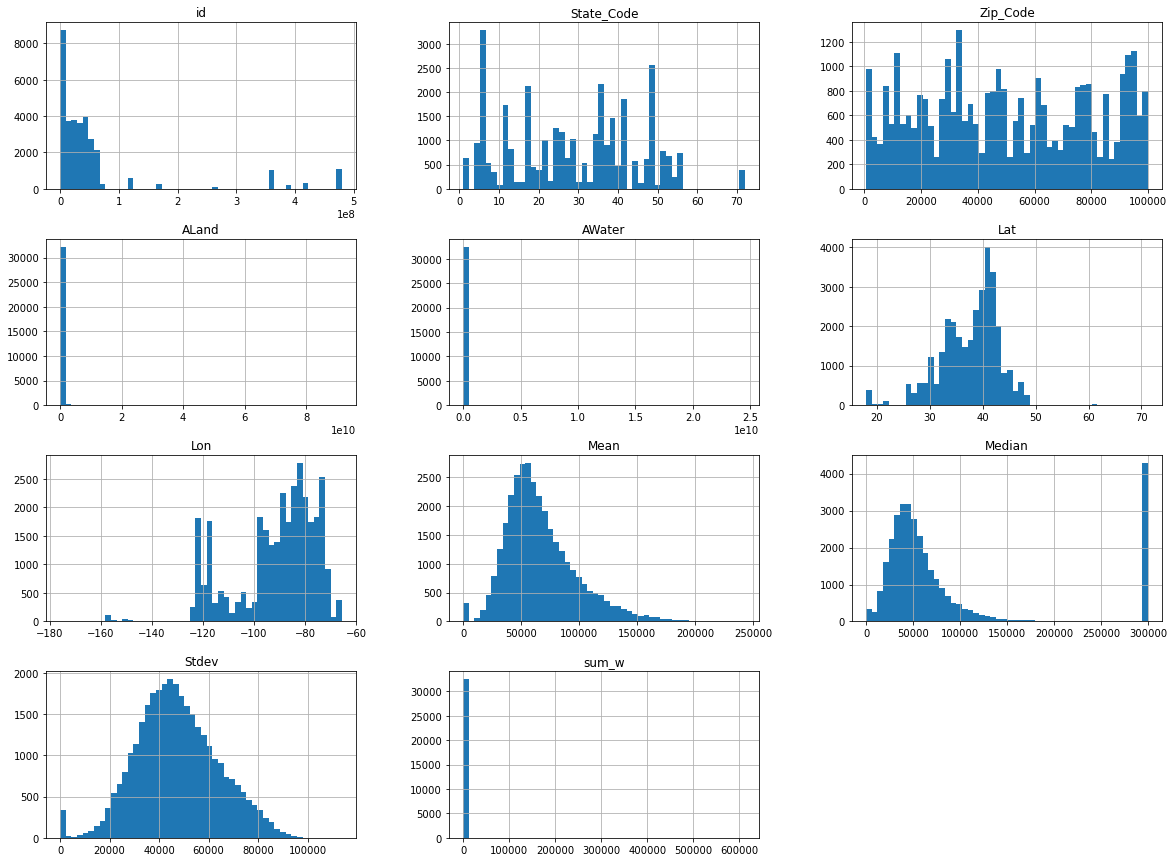

In [122]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [123]:
df = df.drop(columns = "ALand")
df = df.drop(columns = "AWater")
df = df.drop(columns = "Area_Code")
df = df.drop(columns = "County")
df = df.drop(columns = "Place")
df = df.drop(columns = "Type")
df = df.drop(columns = "Primary")
df = df.drop(columns = "City")
df = df.drop(columns = "Lat")
df = df.drop(columns = "Lon")
df = df.fillna(0)
df

,id,State_Code,State_Name,State_ab,Zip_Code,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,36611,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,36048,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,35051,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,36572,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,36528,77948,67225,54270,282.320328
...,...,...,...,...,...,...,...,...,...
32521,720296,72,Puerto Rico,PR,970,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,602,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,602,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,602,0,0,0,0.000000


In [124]:
df.State_ab.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [125]:
'''Preprocessing the Data'''
df['State_Name'] = df['State_Name'].map({'Alabama':1, 'Alaska':2, 'Arizona':3, 'Arkansas':4, 'California':5,
       'Colorado':6, 'Connecticut':7, 'Delaware':8, 'District of Columbia':9,
       'Florida':10, 'Georgia':11, 'Hawaii':12, 'Idaho':13, 'Illinois':14, 'Indiana':15,
       'Iowa':16, 'Kansas':17, 'Kentucky':18, 'Louisiana':19, 'Maine':20, 'Maryland':21,
       'Massachusetts':22, 'Michigan':23, 'Minnesota':24, 'Mississippi':25,
       'Missouri':26, 'Montana':27, 'Nebraska':28, 'Nevada':29, 'New Hampshire':30,
       'New Jersey':31, 'New Mexico':32, 'New York':33, 'North Carolina':34,
       'North Dakota':35, 'Ohio':36, 'Oklahoma':37, 'Oregon':38, 'Pennsylvania':39,
       'Rhode Island':40, 'South Carolina':41, 'South Dakota':42, 'Tennessee':43,
       'Texas':44, 'Utah':45, 'Vermont':46, 'Virginia':47, 'Washington':47,
       'West Virginia':48, 'Wisconsin':49, 'Wyoming':50, 'Puerto Rico':51}).astype(int)
df['State_ab'] = df['State_ab'].map({'AL':1, 'AK':2, 'AZ':3, 'AR':4, 'CA':5, 'CO':6, 'CT':7, 'DE':8, 'DC':9, 'FL':10, 'GA':11,
       'HI':12, 'ID':13, 'IL':14, 'IN':15, 'IA':16, 'KS':17, 'KY':18, 'LA':19, 'ME':20, 'MD':21, 'MA':22,
       'MI':23, 'MN':24, 'MS':25, 'MO':26, 'MT':27, 'NE':28, 'NV':29, 'NH':30, 'NJ':31, 'NM':32, 'NY':33,
       'NC':34, 'ND':35, 'OH':36, 'OK':37, 'OR':38, 'PA':39, 'RI':40, 'SC':41, 'SD':42, 'TN':43, 'TX':44,
       'UT':45, 'VT':46, 'VA':47, 'WA':48, 'WV':49, 'WI':50, 'WY':51, 'PR':52}).astype(int)

In [126]:
x_data = df.drop(columns = "Mean")
y_target = df["Mean"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=95)

In [127]:
'''Fitting the model to predict credit_risk'''
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [128]:
'''Getting accuracy on the test sets'''
y_pred = linreg.predict(x_test)
## the accuracy is lower on a 50/50 or 80/20 split
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of linear regression classifier on test set: 0.80
